# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('cleaned_airbnb_data.csv')

## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



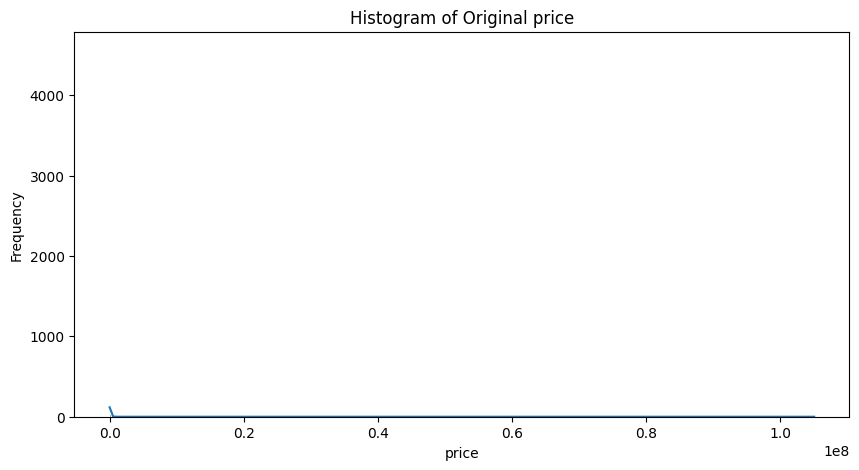

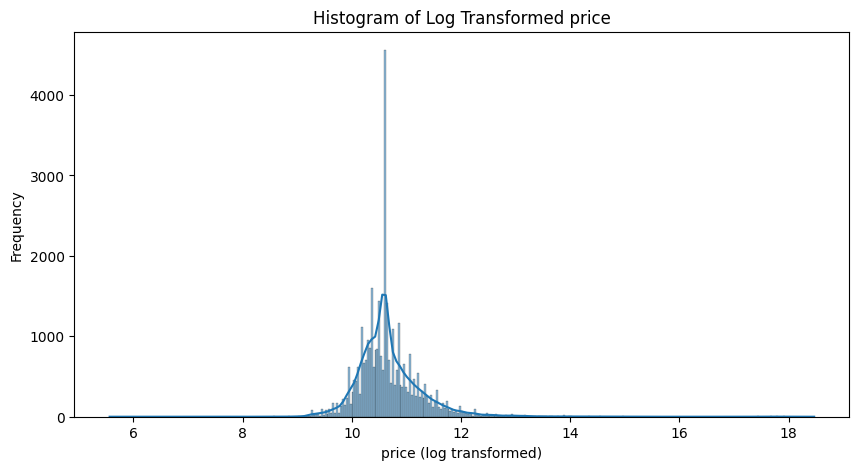

In [7]:
# Choose a numeric column that appears skewed (e.g., 'price')
column_to_examine = 'price'

# Plot a histogram of the original column
plt.figure(figsize=(10, 5))
sns.histplot(df[column_to_examine].dropna(), kde=True)
plt.title(f'Histogram of Original {column_to_examine}')
plt.xlabel(column_to_examine)
plt.ylabel('Frequency')
plt.show()

# Apply a log transformation (add a small constant to handle zeros if necessary)
# Using log1p which is log(1+x) to handle potential zero values gracefully
df[f'{column_to_examine}_log_transformed'] = np.log1p(df[column_to_examine])

# Plot a histogram of the transformed column
plt.figure(figsize=(10, 5))
sns.histplot(df[f'{column_to_examine}_log_transformed'].dropna(), kde=True)
plt.title(f'Histogram of Log Transformed {column_to_examine}')
plt.xlabel(f'{column_to_examine} (log transformed)')
plt.ylabel('Frequency')
plt.show()

### ✍️ Your Response: 🔧
1. I examined the price column.

2. I applied a log transformation (specifically np.log1p) to the price column because it was heavily skewed to the right, meaning there were many listings with low prices and a few with very high prices. The log transformation helps to compress the range of values and make the distribution more symmetrical, which is beneficial for many statistical analyses and machine learning models.

3. The transformed version makes the data more usable for analysis and stakeholder review by providing a more normalized distribution. This makes it easier to visualize trends, compare prices across different groups, and build more accurate models. For stakeholders, a log-transformed price might be easier to interpret in terms of percentage changes rather than absolute dollar amounts.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler



,minimum_nights,minimum_nights_minmax_scaled,number_of_reviews,number_of_reviews_standard_scaled
0,3,0.002002,44,0.353755
1,7,0.006006,123,2.103439
2,29,0.028028,0,-0.620752
3,2,0.001001,45,0.375903
4,2,0.001001,330,6.688053


### ✍️ Your Response: 🔧
1. I scaled the minimum_nights column using Min-Max scaling and the number_of_reviews column using Z-score Normalization (Standardization).

2. These scaled values are more useful than the originals when comparing columns with different ranges or when using algorithms that are sensitive to the scale of features, such as many machine learning models (e.g., K-Nearest Neighbors, Support Vector Machines, Neural Networks) or clustering algorithms. It puts features on a comparable scale, preventing features with larger values from dominating the analysis.

3. Data scientists and analysts at Airbnb would benefit from this transformation when building predictive models (e.g., for pricing, demand forecasting, or guest segmentation). Marketing managers could also use scaled values to understand the relative importance of different listing characteristics in driving engagement or bookings.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


,minimum_nights,minimum_nights_minmax_scaled,number_of_reviews,number_of_reviews_standard_scaled
0,3,0.002002,44,0.353755
1,7,0.006006,123,2.103439
2,29,0.028028,0,-0.620752
3,2,0.001001,45,0.375903
4,2,0.001001,330,6.688053


,count
review_volume_category,
Low,17289
Medium,11739
High,6144


### ✍️ Your Response: 🔧
1. I grouped the number_of_reviews column into three categories: "Low", "Medium", and "High".

2. Someone might prefer this grouped view over raw numbers for easier interpretation and communication, especially for non-technical stakeholders. It simplifies the data and allows for quick comparisons and segmentation based on general review activity levels.

3. This would help the marketing team at Airbnb to easily segment listings for targeted campaigns based on review volume. It could also assist business analysts in understanding the distribution of review activity across different neighborhoods or property types without getting bogged down in exact numbers.

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

,price,minimum_nights,price_per_night,is_long_term_stay
0,67518.0,3,22506.000000,0
1,22375.0,7,3196.428571,0
2,39908.0,29,1376.137931,0
3,52511.0,2,26255.500000,0
4,113360.0,2,56680.000000,0


### ✍️ Your Response: 🔧 🔧
1. I created two new columns: price_per_night and is_long_term_stay.

2. price_per_night would be useful for hosts to understand their effective nightly rate and compare it to similar listings, for analysts to study pricing strategies, and for the platform to analyze market dynamics. is_long_term_stay would be useful for marketing managers to identify listings suitable for long-term stay promotions, for analysts to segment the market, and for hosts to understand the potential for longer bookings.

3. price_per_night helps hosts make better decisions about pricing their listings competitively and understanding their revenue potential. It helps analysts identify pricing trends and anomalies. is_long_term_stay helps marketing managers tailor promotions to attract guests looking for longer stays and helps hosts optimize their listings for different guest segments.



## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [20]:
# Choose a categorical column to encode (e.g., 'room_type')
column_to_encode = 'room_type'

# Check if the column exists before attempting to encode
if column_to_encode in df.columns:
    # Apply one-hot encoding
    df = pd.get_dummies(df, columns=[column_to_encode], prefix=column_to_encode, dtype=int)
    print(f"'{column_to_encode}' column successfully one-hot encoded.")
else:
    print(f"'{column_to_encode}' column not found. It might have already been encoded.")

# Display the first few rows with the new encoded columns
display(df.head())

'room_type' column not found. It might have already been encoded.


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,price_log_transformed,minimum_nights_minmax_scaled,number_of_reviews_standard_scaled,review_volume_category,price_per_night,is_long_term_stay,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,11508,https://www.airbnb.com/rooms/11508,20250129142212,2025-01-30,city scrape,Amazing Luxurious Apt-Palermo Soho,LUXURIOUS 1 BDRM APT- POOL/ GYM/ 24-HR SECURIT...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,...,11.120164,0.002002,0.353755,Medium,22506.000000,0,1,0,0,0
1,14222,https://www.airbnb.com/rooms/14222,20250129142212,2025-01-30,city scrape,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,...,10.015744,0.006006,2.103439,High,3196.428571,0,1,0,0,0
2,15074,https://www.airbnb.com/rooms/15074,20250129142212,2025-01-30,previous scrape,ROOM WITH RIVER SIGHT,NaN,NaN,https://a0.muscache.com/pictures/91166/c0fdcb4...,59338,...,10.594357,0.028028,-0.620752,Low,1376.137931,0,0,0,1,0
3,16695,https://www.airbnb.com/rooms/16695,20250129142212,2025-01-30,city scrape,DUPLEX LOFT 2 - SAN TELMO,NaN,San Telmo is one of the best neighborhoods in ...,https://a0.muscache.com/pictures/619c33a9-0618...,64880,...,10.868797,0.001001,0.375903,Medium,26255.500000,0,1,0,0,0
4,20062,https://www.airbnb.com/rooms/20062,20250129142212,2025-01-30,city scrape,PENTHOUSE /Terrace & pool /City views /2bedrooms,NaN,NaN,https://a0.muscache.com/pictures/165679/2eb448...,75891,...,11.638333,0.001001,6.688053,High,56680.000000,0,1,0,0,0


### ✍️ Your Response: 🔧
1. I encoded the room_type column because it is a categorical variable that needs to be converted into a numerical format for use in many analytical techniques, especially machine learning models.
2. I used one-hot encoding because room_type is a nominal categorical variable, meaning there is no inherent order or ranking between the different room types (e.g., "Entire home/apt" is not "greater than" "Private room"). One-hot encoding creates new binary columns for each category, avoiding any false sense of order or numerical relationship.
3. This transformation is crucial for building a pricing model, as machine learning algorithms typically require numerical input. By encoding room_type, the model can learn how different room types impact pricing. For a dashboard or business report, while the encoded columns themselves might not be directly displayed, the insights derived from models using this encoded data (e.g., average price by room type) would be valuable. It allows for the inclusion of a key categorical feature in quantitative analysis.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. The transformation step that felt most important was the one-hot encoding of the room_type column. This is because room_type is a fundamental characteristic of an Airbnb listing and converting it into a numerical format is essential for incorporating this crucial information into most analytical models, especially for predicting pricing or demand.

2. The creation of the price_per_night and is_long_term_stay columns would be most useful to a host. price_per_night gives them a clear metric to compare their listing's pricing against others, helping them optimize their rates. is_long_term_stay helps them understand if their listing is attracting or suitable for longer bookings, which can influence their strategy for attracting different types of guests. An analyst would benefit significantly from all transformations, as they prepare the data for various analyses and modeling. A city planner might find the grouped review volume and long-term stay flag useful for understanding tourism patterns and potential housing impacts.

3. If I were going to build a tool or dashboard, I would next perform more in-depth feature engineering and selection. This would involve exploring interactions between the transformed features and potentially creating more complex features. I would also consider preparing the data for a specific task, like building a pricing prediction model or a guest segmentation tool. Visualizations that show the relationships between the transformed features and key metrics (like availability or booking rates) would be crucial for a dashboard.
4. This assignment directly relates to my customized learning outcome focused on applying data transformation techniques to prepare real-world datasets for analysis and modeling. By performing skew handling, scaling, binning, feature creation, and encoding on the Airbnb dataset, I've practiced key data transformation steps that are critical for making raw data usable and extracting meaningful insights, which is the core of my learning objective.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [21]:
!jupyter nbconvert --to html "assignment_07_ChristensenBryson.ipynb"

[NbConvertApp] Converting notebook assignment_07_ChristensenBryson.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 395932 bytes to assignment_07_ChristensenBryson.html
